In [15]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
conn_str = (
    r"Driver={SQL Server Native Client 11.0};"
    r"Server=(local);"
    r"Database=ML;"
    r"Trusted_Connection=yes;"
    )

conn = pyodbc.connect(conn_str)

df = pd.read_sql_query("SELECT cast(tipped as int) as tipped, tip_amount, fare_amount FROM [NYCTaxi].[Trips]", conn)

d:\My_Projects\Praktyczne_Uczenie_Maszynowe\Tasks\venv\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [17]:
df.head()

,tipped,tip_amount,fare_amount
0,0,0.0,6.0
1,0,0.0,6.0
2,0,0.0,6.0
3,0,0.0,6.0
4,0,0.0,6.0


Text(0.5, 1.0, 'Scatter, Fare amount to Tip amount')

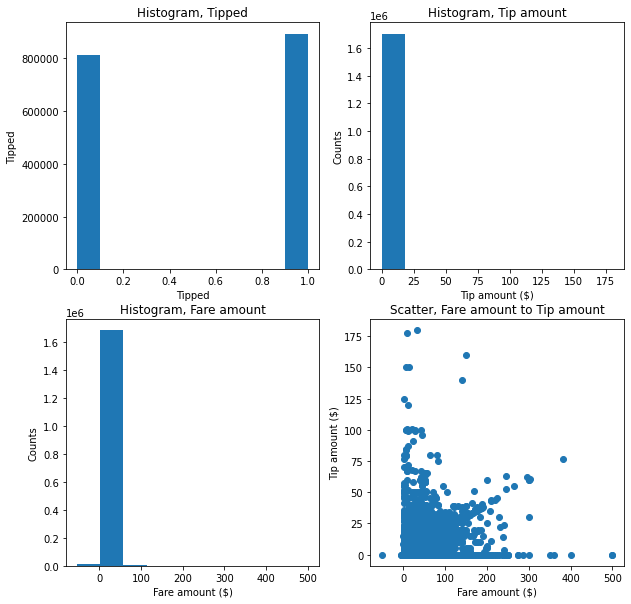

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0][0].hist(df["tipped"])
ax[0][0].set_xlabel("Tipped")
ax[0][0].set_ylabel("Tipped")
ax[0][0].set_title("Histogram, Tipped")

ax[0][1].hist(df["tip_amount"])
ax[0][1].set_xlabel("Tip amount ($)")
ax[0][1].set_ylabel("Counts")
ax[0][1].set_title("Histogram, Tip amount")

ax[1][0].hist(df["fare_amount"])
ax[1][0].set_xlabel("Fare amount ($)")
ax[1][0].set_ylabel("Counts")
ax[1][0].set_title("Histogram, Fare amount")

ax[1][1].scatter(df["fare_amount"], df["tip_amount"])
ax[1][1].set_xlabel("Fare amount ($)")
ax[1][1].set_ylabel("Tip amount ($)")
ax[1][1].set_title("Scatter, Fare amount to Tip amount")


According the plots a bit more than 50% of the trips ended with a tip (that's surprisingly small for the US). The smallest fare was negative and the biggest was 500$ which is a lot considering it was around NY. We have to clean the data and add some new columns.

In [19]:
df = pd.read_sql_query("SELECT tipped, fare_amount, passenger_count, trip_time_in_secs, trip_distance, [NYCTaxi].fnCalculateDistance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude) as direct_distance FROM [NYCTaxi].[Trips]", conn)
df.head()

d:\My_Projects\Praktyczne_Uczenie_Maszynowe\Tasks\venv\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,tipped,fare_amount,passenger_count,trip_time_in_secs,trip_distance,direct_distance
0,0,6.0,2,358,1.0,0.676471
1,0,6.0,2,353,1.0,0.602979
2,0,6.0,2,325,1.0,0.914805
3,0,6.0,2,308,1.0,0.785789
4,0,6.0,2,342,1.0,0.801586


Split out data into Y and X. And then split it to test and train data.

In [24]:
y = df["tipped"]
X = df.drop(columns=["tipped"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we will use LogisticRegression from sklearn to predict if the taxi driver will receive a tip. Then we calculate the accuracy of our model.

In [21]:
SKLalgo = LogisticRegression()
logistObj = SKLalgo.fit(X_train, y_train)

In [22]:
print("Accuracy: ", logistObj.score(X_test, y_test))

Accuracy:  0.5245956477851593


In [56]:
comparison = pd.DataFrame()

test = X_test.reset_index().drop(columns=["index"])
orig = y_test.reset_index().drop(columns=["index"])

comparison["prediction"] = logistObj.predict(test)
comparison["original"] = orig

comparison = pd.concat([test, comparison], ignore_index=False, axis=1)
print(comparison)

        fare_amount  passenger_count  trip_time_in_secs  trip_distance  \
0              11.0                5               1080           1.96   
1               9.0                1                420           2.30   
2              12.0                1               1105           1.30   
3              18.0                1               1680           3.39   
4              11.5                1                644           2.90   
...             ...              ...                ...            ...   
511183         19.5                1               1140           5.30   
511184          5.5                2                277           0.90   
511185         16.0                1                891           4.50   
511186         11.0                1                900           1.72   
511187         17.5                1               1619           2.70   

        direct_distance  prediction  original  
0              0.705946           1         0  
1              